# Intro to Stats Learning

## Lab 9 - Support Vector Machine

> https://juliaai.github.io/DataScienceTutorials.jl/isl/lab-9/
> (project folder) https://raw.githubusercontent.com/juliaai/DataScienceTutorials.jl/gh-pages/__generated/ISL-lab-9.tar.gz

In [1]:
using Pkg; Pkg.activate("D:/JULIA/6_ML_with_Julia/ISL-lab-9"); Pkg.instantiate()

  Activating project at `D:\JULIA\6_ML_with_Julia\ISL-lab-9`


> Getting started
> 1. Basic tuning

### Getting started
--- 

In [2]:
using MLJ
import RDatasets: dataset
using PrettyPrinting
using Random

We start by generating a 2D cloud of points

In [3]:
Random.seed!(3203)
X = randn(20, 2)
y = vcat(-ones(10), ones(10))

20-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0

which we can visualize

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\jeffr\.julia\packages\PyCall\L0fLP\src\numpy.jl:67


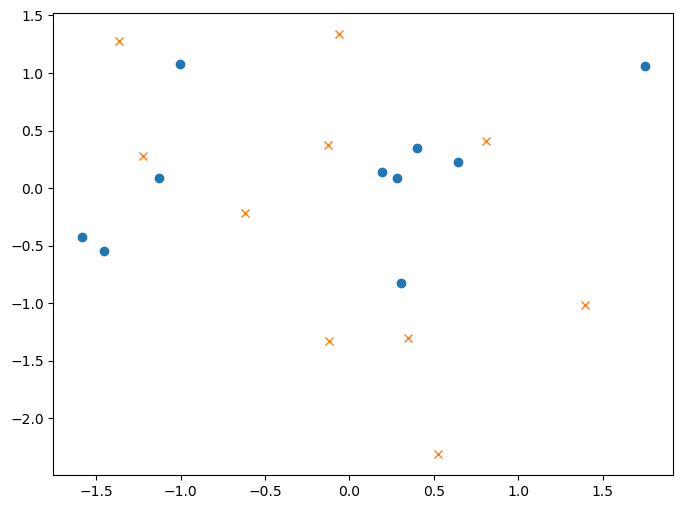

In [4]:
using PyPlot
figure(figsize = (8, 6))

ym1 = y .== -1
ym2 = .!ym1

plot(X[ym1, 1], X[ym1, 2], ls="none", marker="o")
plot(X[ym2, 1], X[ym2, 2], ls="none", marker="x")

savefig("./plots/3.7.1.png")

Let's wrap the data as a table:

In [5]:
X = MLJ.table(X)
y = categorical(y);

and fit a SVM classifier

In [6]:
SVC = @load SVC pkg=LIBSVM

svc_mdl = SVC()
svc = machine(svc_mdl, X, y)

fit!(svc);

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


import MLJLIBSVMInterface ✔


┌ Info: Training Machine{SVC,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


As usual we can check how it preforms

In [7]:
ypred = MLJ.predict(svc, X)
misclassification_rate(ypred, y)

0.3

Not bad.

### Basic tuning

As usual we could tune the model, for instance the penalty encoding the tradeoff between margin width and misclassification:

In [8]:
rc = range(svc_mdl, :cost, lower = 0.1, upper = 5)
tm = TunedModel(model = svc_mdl,
                ranges = [rc],
                tuning = Grid(resolution = 10),
                resampling = CV(nfolds = 3, rng = 33),
                measure = misclassification_rate)

mtm = machine(tm, X, y)

fit!(mtm)

ypred = MLJ.predict(mtm, X)
misclassification_rate(ypred, y)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Attempting to evaluate 10 models.
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:02


0.2

You could also change the kernel etc.